# Week 8: Parameter Estimation

In [1]:
# Loading the libraries
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import scipy.optimize as opt
#from scipy.integrate import quad

## Day 1: Bootstrap Method

* The **bootstrap** methods are a class of techniques that can be used to construct an interval estimate of a parameter.
* Bootstrap methods are **general** in a sense that they can be applied to *any* parameter
* These methods are "empirical" and do not require knowledge of the sampling distribution of the statistic that corresponds to the parameter of interest. Instead, they rely on resampling and simulation


## How does it work?
The situation is as follows:
* We have a sample of data of size `n`
* The sample comes from a population which follows some distribution (which we do not know)
* We wish to estimate some parameter of the population distribution by constructing an interval estimate for it

To simplify things, we will talk about the population mean $\mu$, but the same approach applies to any other parameter (e.g. median, standard devaition etc).
To get what we need we do the following:
* Calculate the mean of the original sample $\bar{x}$
* Generate many **bootstrapped samples** from the original sample, allowing for sampling **with replacement**. If you generate `m` bootstrapped samples (thousands), then for each of these calculate the mean. This will give you a sequence
$$\bar{x}_1^*, \bar{x}_2^*, \ldots, \bar{x}_{m}^*$$
of means of the bootstrapped samples.
* Calculate a sequence of differences $\delta_1^*, \delta_2^*, \ldots, \delta_m^*$ where:
$$\delta_i^* = \bar{x}_i^* - \bar{x}$$
for each $i = 1, 2, \ldots, m$. This sequence captures the variability of the original distribution, so it is crucial to the process
* Say we want a `90%` "confidence" interval. We calculate $\overline{\delta}$, and $\underline{\delta}$, the 5-th and 95-th percentile respectively
* Finally, the interval estimate for the population mean $\mu$ is given as:
$$ \left( \bar{x} - \underline{\delta},\, \bar{x} - \overline{\delta} \right) $$
Note that this interval is **NOT** the same as the actual confidence interval for the population parameter!

## Example 1
Test the efficiency of the bootstrap method by using it to construct a 90% "confidence" interval for the mean of a normal distribution.
* Use normal distribution $\mathcal{N}(\mu=10, \sigma=2)$
* Draw a random sample of size `n=20` from this distribution
* Estimate $\mu$ with an interval using bootstrapping

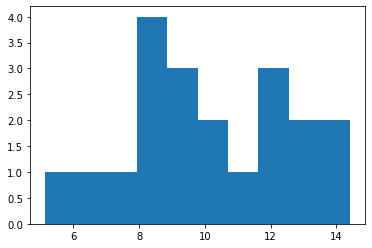

array([ 7.82873879, 11.99469089, 10.565957  ,  6.98741057,  8.8427995 ,
       13.30287307,  5.14664151,  9.14217474, 12.53187252,  8.2665192 ,
        8.6422277 ,  9.81058206, 12.98277925,  8.72219601,  9.11203608,
        9.13129745, 14.41186017, 14.37357218, 12.0081078 , 10.7723728 ])

In [24]:
# setting the random seed
np.random.seed(123)
n = 20

# getting the original sample
sample = stats.norm(10, 2).rvs(size=n)

# plot the sample
plt.figure()
plt.hist(sample)
plt.show()

<AxesSubplot:ylabel='Count'>

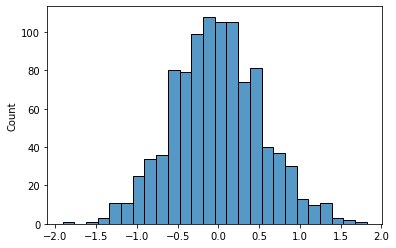

In [3]:
# start with the bootstrapping
m = 1000 # number of bootstrap samples
deltas = np.zeros(m) # the differences
sample_mean = np.mean(sample)

for i in range(m):
    
    # choose a random sample
    boot_sample = np.random.choice(sample, n)
    
    # calculate the difference
    deltas[i] = np.mean(boot_sample) - sample_mean
    
# plot the deltas, for fun
sns.histplot(deltas)

In [4]:
# constructing the interval

delta_bar = np.percentile(deltas, [5, 95])

l = sample_mean - delta_bar[1]
u = sample_mean - delta_bar[0]

print(f'The 90% "confidence" interval is ({l}, {u})')

The 90% "confidence" interval is (9.322918607854852, 11.144484060978959)


In [5]:
print(np.__version__)

1.20.1


## Example 2
For the same distribution given in **Example 1**, using the same sample, estimate the standard deviation of the population.

[-0.52154425  0.4316867 ]
The 90% "confidence interval is (2.0195398364603148, 2.9727707829849264)"


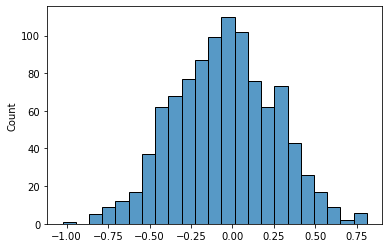

In [6]:
# start with the bootstrapping
m = 1000 # number of bootstrap samples
deltas = np.zeros(m) # the differences
sample_std = np.std(sample)

for i in range(m):
    
    # choose a random sample
    boot_sample = np.random.choice(sample, n)
    
    # calculate the difference
    deltas[i] = np.std(boot_sample) - sample_std

# plot the deltas, for fun
sns.histplot(deltas)

# constructing the interval
delta_bar = np.percentile(deltas, [5, 95])
print(delta_bar)
l = sample_std - delta_bar[1]
u = sample_std - delta_bar[0]
print(f'The 90% "confidence interval is ({l}, {u})"')

<AxesSubplot:ylabel='Count'>

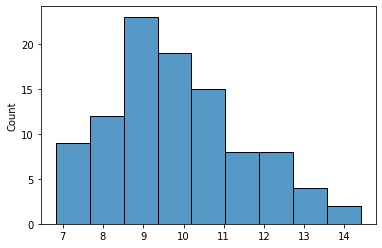

In [23]:
# try again with a larger sample
np.random.seed(112)
sample = stats.norm(10, 2).rvs(100)

# plot the new sample
sns.histplot(sample)

[-0.47916538  0.35773772]
The 90% "confidence interval is (1.278022919483239, 2.114926021664368)"


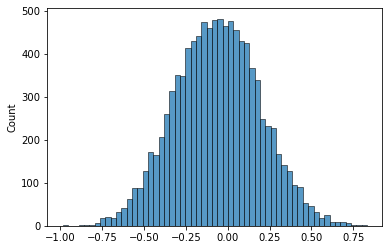

In [8]:
# re-run the bootstrap
# start with the bootstrapping
m = 10000 # number of bootstrap samples
deltas = np.zeros(m) # the differences
sample_std = np.std(sample)

for i in range(m):
    
    # choose a random sample
    boot_sample = np.random.choice(sample, n)
    
    # calculate the difference
    deltas[i] = np.std(boot_sample) - sample_std

# plot the deltas, for fun
sns.histplot(deltas)

# constructing the interval
delta_bar = np.percentile(deltas, [5, 95])
print(delta_bar)
l = sample_std - delta_bar[1]
u = sample_std - delta_bar[0]
print(f'The 90% "confidence interval is ({l}, {u})"')

## Example 3: Old Faithful and estimating the median
Old Faithful is a geyser in Yellowstone National Park in Wyoming. Data given in `faithful.csv` contains information about a sample of consecutive eruptions of the geyser.

Cosntruct a 95% bootstrap confidence interval for the median length of the eruptions.

,eruptions,waiting
0,216,79
1,108,54
2,200,74
3,137,62
4,272,85


<AxesSubplot:ylabel='Count'>

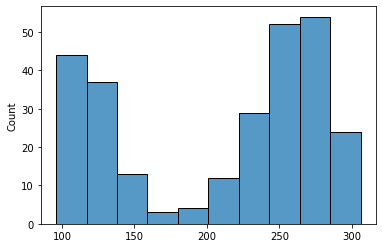

In [9]:
# reading the file
df = pd.read_csv('faithful.csv')
display(df.head())

# get the sample
sample = df['eruptions'].to_numpy()

# plot the sample
sns.histplot(sample)

[-10.       6.5125]
The 90% "confidence interval is (233.4875, 250.0)"


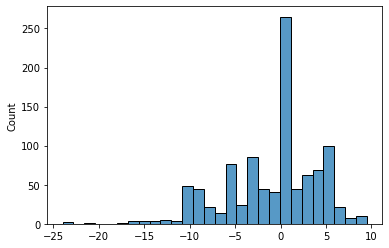

In [10]:
# bootstrap
# start with the bootstrapping
m = 1000 # number of bootstrap samples
deltas = np.zeros(m) # the differences
sample_median = np.median(sample)
for i in range(m):
    # choose a random sample
    boot_sample = np.random.choice(sample, df['eruptions'].count())
    # calculate the difference
    deltas[i] = np.median(boot_sample) - sample_median
# plot the deltas, for fun
sns.histplot(deltas)
# constructing the interval
delta_bar = np.percentile(deltas, [2.5, 97.5])
print(delta_bar)
l = sample_median - delta_bar[1]
u = sample_median - delta_bar[0]
print(f'The 90% "confidence interval is ({l}, {u})"')

## Hypothesis testing with bootstrapping
It is possible to use the bootstrap method to test hypotheses. The approach is pretty much the same as with generating bootstrap "confidence" intervals, except that in this scenario we calculate a p-value for the test.

We will illustrate the application of this approach in a case when we test about the population mean, but as before -- it can be set up to test hypotheses about any parameter.

### Inference for the population mean
Given a sample of size $n$, we wish to test the following hypotheses about the population mean $\mu$:
$$
\begin{align}
H_0: \mu &= \mu_0\\
H_a: \mu &\neq \mu_0
\end{align}
$$

The process is identical up to the point when we calculate the sequence of differences $(\delta_i^*)$ for $i=1, \ldots, n$. In the last step, we just calculate the p-value as the probability:
$$
p = P\left( |\delta^*| >  \left| \bar{x}-\mu_0 \right| \right)
$$

If we work with one-sided alternative, then:
* If $H_a : \mu < \mu_0$, then the p-value is $p = P\left( \delta^* <  \bar{x}-\mu_0 \right)$, and
* If $H_a : \mu > \mu_0$, then the p-value is $p = P\left( \delta^* >  \bar{x}-\mu_0 \right)$

Similar rules would apply for other parameters

### Example 4
Verify the bootstrap method for hypothesis testing on the following *controled* case. Choose a random sample of size $n=20$ from a normal distribution $\mathcal{N}(10, 2)$ and then test the hypotheses:
$$
\begin{align}
H_0: \mu &= 11\\
H_a: \mu &\neq 11
\end{align}
$$

<AxesSubplot:ylabel='Count'>

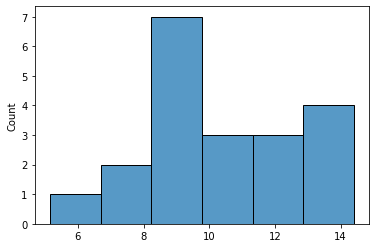

In [11]:
#set up, generate, and plot the sample
np.random.seed(123)
mu_0 = 11
n = 20

sample = stats.norm(10, 2).rvs(n)
sns.histplot(sample)

<AxesSubplot:ylabel='Count'>

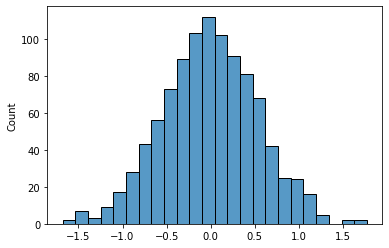

In [12]:
# start with the bootstrapping
m = 1000
deltas = np.zeros(m)
sample_mean = np.mean(sample)

np.random.seed(32123)
for i in range(m):
    boot_sample = np.random.choice(sample, n)
    deltas[i] = np.mean(boot_sample) - sample_mean
    
# plot the deltas, for fun
sns.histplot(deltas)

In [13]:
# calculate |mean - mu_0|
abs_diff = np.abs(sample_mean - mu_0)
print('abs_diff = ', abs_diff)

# calculate the p-value
p = deltas[np.abs(deltas) > abs_diff].size / deltas.size
print('p-value = ', p)

abs_diff =  0.7711645360894188
p-value =  0.148


In [14]:
# Just for fun, see what does the t-test say
stats.ttest_1samp(sample, mu_0)

Ttest_1sampResult(statistic=-1.3713250204572047, pvalue=0.18625365009788034)

### Example 5
For the eruption times for the Old Faithful data, test the following hypotheses about the population IQR:
$$
\begin{align}
H_0: \mathrm{IQR} &= 145\\
H_a: \mathrm{IQR} &< 145
\end{align}
$$

In [15]:
# recall the data
display(df.head())
sample = df['eruptions'].to_numpy()

,eruptions,waiting
0,216,79
1,108,54
2,200,74
3,137,62
4,272,85


In [16]:
# calculate the sample IQR
sample_iqr = np.percentile(sample, 75) - np.percentile(sample, 25)
sample_iqr

137.5

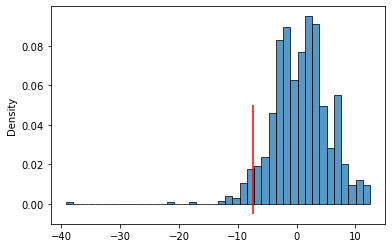

In [17]:
# bootstrap
np.random.seed(32123)
m = 1000
n = sample.size
iqr_0 = 145 # as in H_a
deltas = np.zeros(m)


for i in range(m):
    boot_sample = np.random.choice(sample, sample.size)
    deltas[i] = ( np.percentile(boot_sample, 75) - np.percentile(boot_sample, 25) ) - sample_iqr


# get the difference
diff = sample_iqr - iqr_0


# plot the deltas and the difference 
plt.figure()
sns.histplot(deltas, stat='density')
plt.vlines(diff, -0.005, 0.05, colors='r')
plt.show()

In [18]:
# get the p-value
p = deltas[deltas < diff].size / deltas.size
print('p-value = ', p)

p-value =  0.033


## Random sampling from a distribution

In applications frequently there is need to draw/generate a random sample which follows a certain distribution. Now we will describe one very simple method that can generate random samples from just about any distribution. This method depends on an already implemeted random number generator for the uniform distribution.

Say you have a probability densiti function $f(x)$ over the interval $[a, b]$. Let $M$ be a number such that

$$M > \max_{x \in [a, b]}{f(x)}$$

Next we generate random pairs of numbers $(x_k, y_k)$ such that $a \leqslant x_k \leqslant b$ and $0 \leqslant y_k \leqslant M$ ($y$ must be positive because the density function is always positive). These numbers are generated uniformly in the intervals.

Now, we can select the sample in the following way: if $y_k < f(x_k)$, then put $x_k$ in the sample; otherwise, discard $x_k$ and move to the next pair. At the end of the process, the sample that we selected will follow the distribution given by the density $f(x)$.

### Example 5
Generate a random sample of 150 numbers in the interval $[0, 10]$ that follow a $\chi^2$-disribution with 3 degrees of freedom.

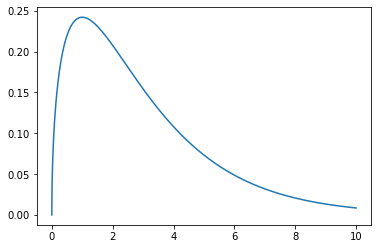

In [19]:
# Let's first sketch the density to get an idea what to expect
X = stats.chi2(df=3)
xs = np.linspace(0, 10, 1000)
plt.figure()
plt.plot(xs, X.pdf(xs))
plt.show()

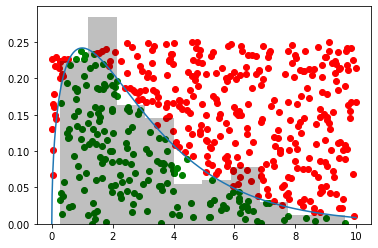

In [20]:
# Generate the points
n_pts = 150
a = 0
b = 10
M = 0.25

np.random.seed(12)
x = []
y = []
num_in_sample = 0

while num_in_sample < 500:
    # Generate random pair
    x_rand = np.random.random() * (b - a) + a # stretch by (b-a) and shift by (a)
    y_rand = np.random.random() * M
    
    x.append(x_rand)
    y.append(y_rand)
    # Decide if you keep the x
    #if y_rand < X.pdf(x_rand):
        #keep x
    num_in_sample += 1


x = np.array(x)
y = np.array(y)

# Plot the sample 
plt.figure()
plt.plot(xs, X.pdf(xs))
plt.scatter(x[y < X.pdf(x)], y[y < X.pdf(x)], c='g') #keep
plt.scatter(x[y >= X.pdf(x)], y[y >= X.pdf(x)], c='r') #discard
plt.hist(x[y < X.pdf(x)], color='k', alpha=0.25, density=True) #keep
plt.show()

In [21]:
x=np.array(x)
x[y < X.pdf(x)]

array([1.54162842, 2.63315015, 9.00714854, 2.83828353, 7.6456045 ,
       1.35210178, 4.655081  , 0.8427267 , 6.36199994, 3.0017006 ,
       0.55019993, 4.16369657, 1.1360172 , 0.73470044, 0.31151071,
       3.19476311, 6.88927666, 3.12283997, 1.94674629, 3.77440782,
       1.91710772, 1.09485421, 1.26387284, 2.90121937, 6.59475954,
       3.55442925, 1.77506367, 0.8463852 , 3.16807901, 1.49223685,
       3.4459494 , 7.02982173, 2.46601478, 6.32031547, 3.90309209,
       0.510386  , 1.05895152, 1.41558412, 0.99204699, 2.48438489,
       5.83823067, 2.15357823, 7.75848946, 6.4548537 , 1.32085305,
       0.84437808, 3.63737819, 1.06424664, 5.19248805, 3.98855194,
       6.13435115, 3.51541547, 3.78385301, 2.2688029 , 3.19777974,
       0.37941219, 1.70649006, 8.63751826, 0.74093209, 2.49363523,
       1.43480257, 2.69124908, 5.26432764, 4.56214112, 1.63787541,
       1.54392661, 1.51425779, 1.6429848 , 1.98053087, 3.10848886,
       2.25263254, 1.07217727, 2.45980088, 3.6043789 , 4.11160

### Example 6
Generate a random sample of 100 numbers in the interval $[-5, 5]$ that follow a $t$-distribution with one degree of freedom.

In [22]:
#Get the distribution
T = stats.t(df=1)

# Generate the points
n_pts = 150
a = -5.0
b = 5.0
M = 0.35

np.random.seed(124)
x = []
y = []
num_in_sample = 0

